## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import regex as re

## Overview of column features:
- Shape of data
- Number of non-null values
- Data type for column features

In [ ]:
filepath = "fake_job_postings.csv"
dirty_posting = pd.read_csv(filepath)

In [ ]:
dirty_posting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# Distribution of fake and real job postings

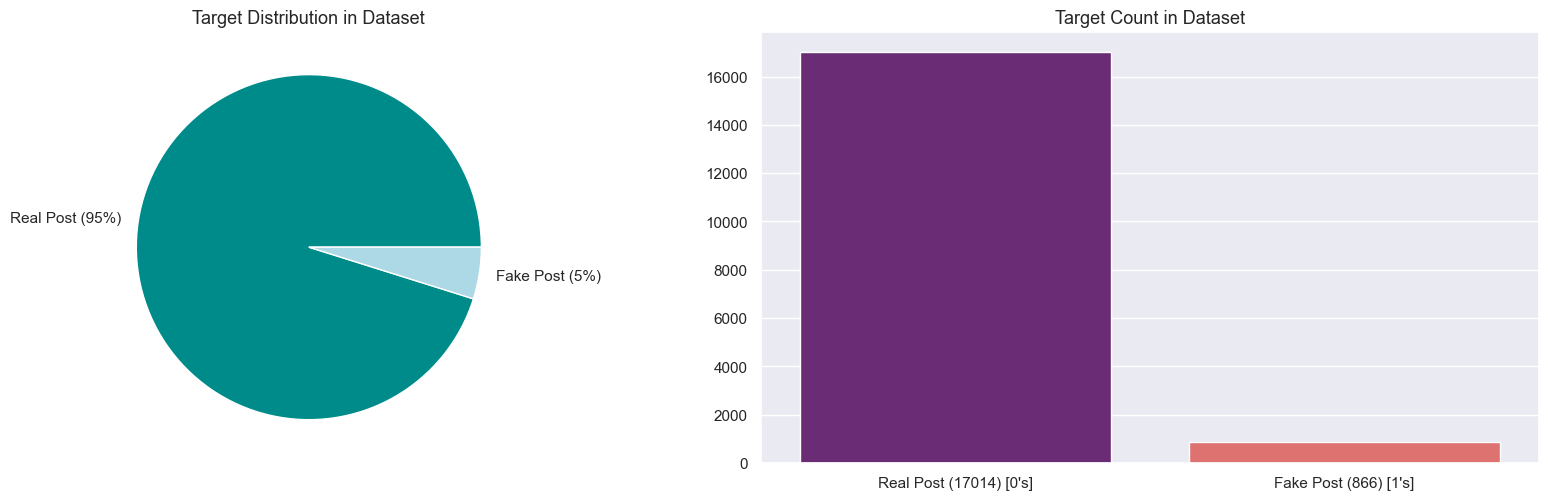

In [ ]:
# Pie chart and bar plot of real job postings[95%] and fake job postings[%5]

fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

my_colors = ['darkcyan', 'lightblue']
dirty_posting["fraudulent"].value_counts().plot(kind='pie', colors=my_colors, ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'])
temp = dirty_posting["fraudulent"].value_counts()
sb.barplot(temp.index, temp, ax=axes[1], palette = "magma")

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post (17014) [0's]", "Fake Post (866) [1's]"])

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()

# Heat map of relative percentage of data points for each class in categorical variables
- Boolean (telecommuting, has_company_logo, has_questions)
- Multi-class (employment_type, required_experience, required_education)

In [ ]:
# Function for obtaining confusion matrix and normalizing class data
def feature_meaning(feature):
    mat = dirty_posting.groupby([feature, 'fraudulent']).size().unstack()
    mat[0] = mat[0].astype(np.float64)
    mat[1] = mat[1].astype(np.float64)
    cat_len = mat.shape[0]    
    
    for i in range(0,cat_len):
        sub_sum = mat[0][i] + mat[1][i]
        mat[0][i] = mat[0][i]/sub_sum
        mat[1][i] = mat[1][i]/sub_sum
    return(mat)

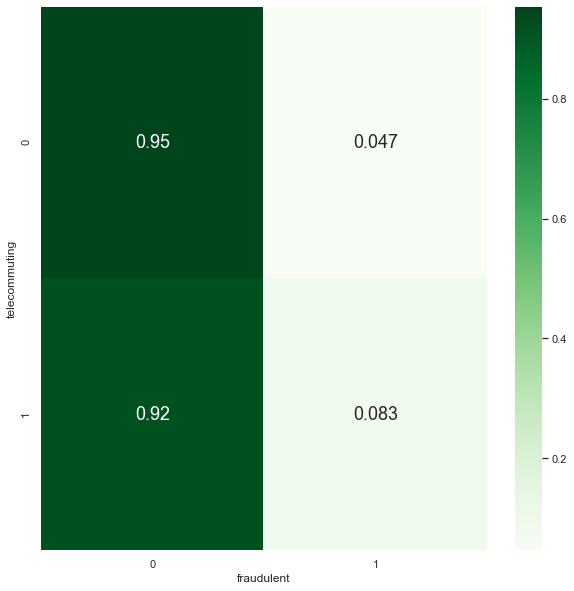

In [ ]:
# Heatmap of Telecommuting feature
feature = 'telecommuting'
mat = feature_meaning(feature)

f, axes = plt.subplots(1,1, figsize = (10,10))
sb.heatmap(mat, annot = True, annot_kws={'size': 18}, cmap = 'Greens')

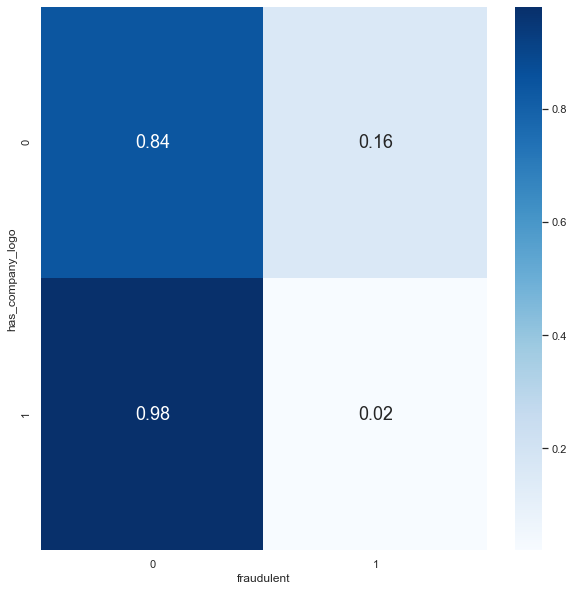

In [ ]:
# Heatmap of has_company_logo feature
feature = 'has_company_logo'
mat = feature_meaning(feature)

f, axes = plt.subplots(1,1, figsize = (10,10))
sb.heatmap(mat, annot = True, annot_kws={'size': 18}, cmap = 'Blues')

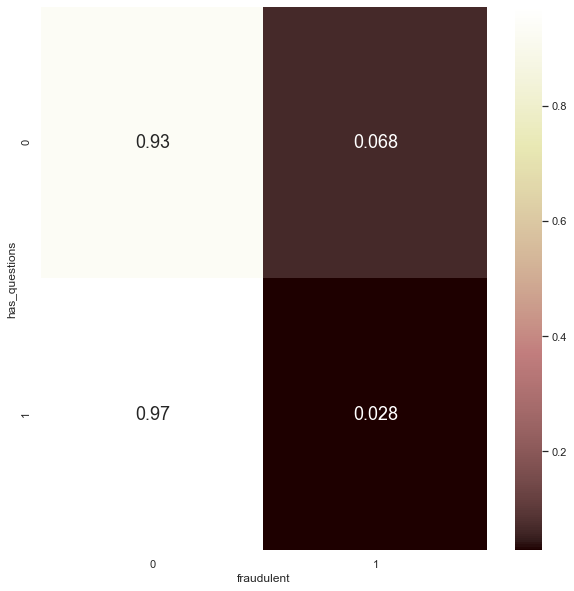

In [ ]:
# Heatmap of has_questions feature
feature = 'has_questions'
mat = feature_meaning(feature)

f, axes = plt.subplots(1,1, figsize = (10,10))
sb.heatmap(mat, annot = True, annot_kws={'size': 18}, cmap = 'pink')

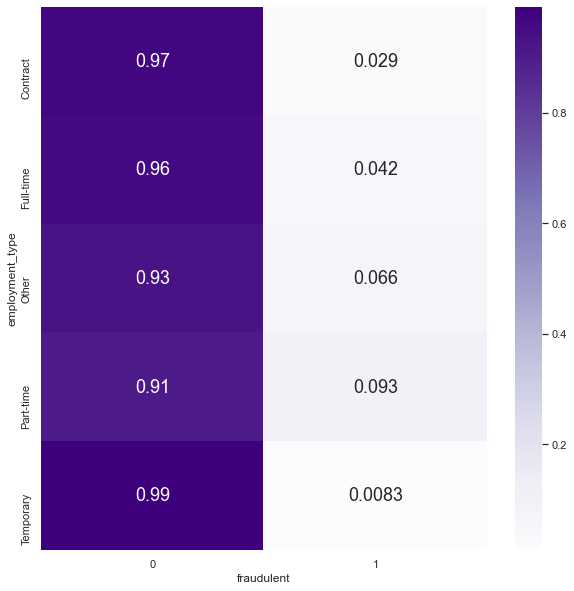

In [ ]:
# Heatmap of employment_type feature
feature = 'employment_type'
mat = feature_meaning(feature)

f, axes = plt.subplots(1,1, figsize = (10,10))
sb.heatmap(mat, annot = True, annot_kws={'size': 18}, cmap = 'Purples')

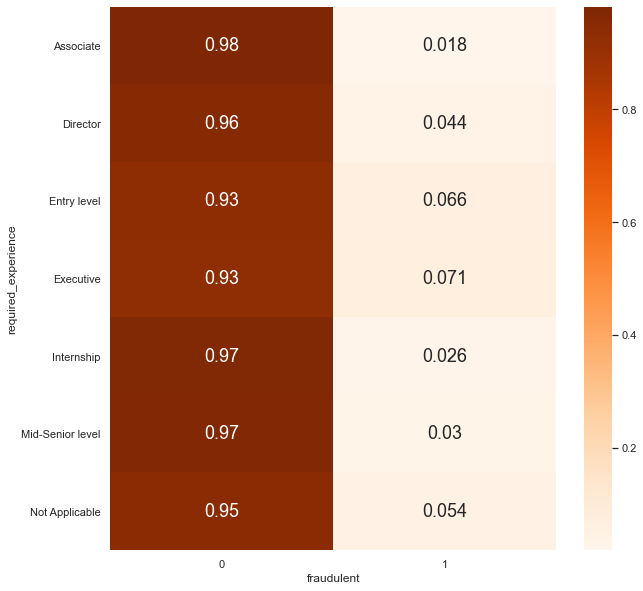

In [ ]:
# Heatmap of required_experience feature
feature = 'required_experience'
mat = feature_meaning(feature)

f, axes = plt.subplots(1,1, figsize = (10,10))
sb.heatmap(mat, annot = True, annot_kws={'size': 18}, cmap = 'Oranges')

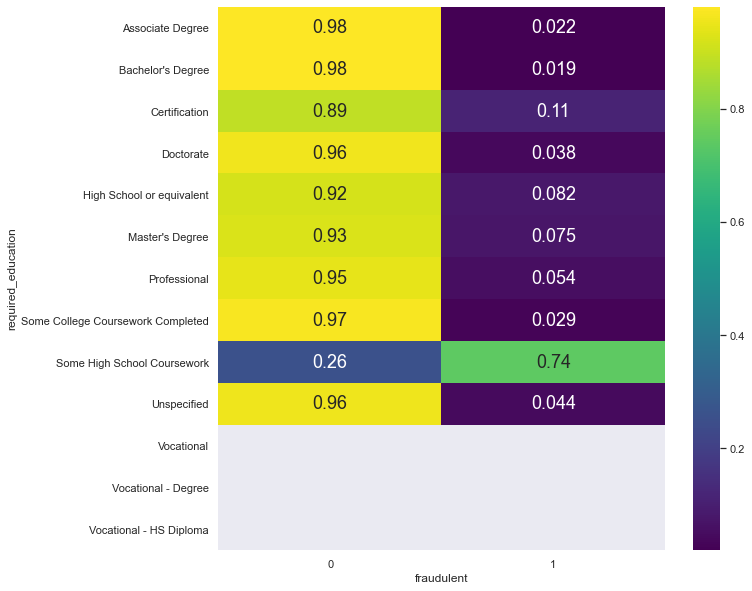

In [ ]:
# Heatmap of required_education feature
feature = 'required_education'
mat = feature_meaning(feature)

f, axes = plt.subplots(1,1, figsize = (10,10))
sb.heatmap(mat, annot = True, annot_kws={'size': 18}, cmap = 'viridis')

# Top class values for categorical features
- title
- industry
- function

In [ ]:
# Top titles and count of fraudulent jobs
print(dirty_posting[dirty_posting.fraudulent==1].title.value_counts()[:10])

Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Data Entry Admin/Clerical Positions - Work From Home                    21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Network Marketing                                                       10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Payroll Clerk                                                           10
Account Sales Managers $80-$130,000/yr                                  10
Name: title, dtype: int64


In [ ]:
# Top titles and count of real jobs
print(dirty_posting[dirty_posting.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [ ]:
# Top industries and count of fraudulent jobs
print(dirty_posting[dirty_posting.fraudulent==1].industry.value_counts()[:10])

Oil & Energy                           109
Accounting                              57
Hospital & Health Care                  51
Marketing and Advertising               45
Financial Services                      35
Information Technology and Services     32
Telecommunications                      26
Consumer Services                       24
Real Estate                             24
Leisure, Travel & Tourism               21
Name: industry, dtype: int64


In [ ]:
# Top industries and count of real jobs
print(dirty_posting[dirty_posting.fraudulent==0].industry.value_counts()[:10])

Information Technology and Services    1702
Computer Software                      1371
Internet                               1062
Education Management                    822
Marketing and Advertising               783
Financial Services                      744
Hospital & Health Care                  446
Consumer Services                       334
Telecommunications                      316
Retail                                  218
Name: industry, dtype: int64


In [ ]:
# Top functions and count of fraudulent jobs
print(dirty_posting[dirty_posting.fraudulent==1].function.value_counts()[:10])

Administrative            119
Engineering               113
Customer Service           67
Sales                      41
Information Technology     32
Other                      32
Accounting/Auditing        29
Finance                    15
Business Development       13
Marketing                  10
Name: function, dtype: int64


In [ ]:
# Top functions and count of real jobs
print(dirty_posting[dirty_posting.fraudulent==0].function.value_counts()[:10])

Information Technology    1717
Sales                     1427
Engineering               1235
Customer Service          1162
Marketing                  820
Administrative             511
Design                     337
Health Care Provider       337
Education                  324
Management                 311
Name: function, dtype: int64


In [ ]:
dirty_posting[['description', 'company_profile', 'requirements', 'benefits']] = dirty_posting[['description', 'company_profile', 'requirements', 'benefits']].applymap(str)
dirty_posting['text'] = dirty_posting['description'] + ' ' +dirty_posting['company_profile'] + ' ' + dirty_posting['requirements'] + ' ' + dirty_posting['benefits']

fraudjobs_text = dirty_posting[dirty_posting.fraudulent==1].text
actualjobs_text = dirty_posting[dirty_posting.fraudulent==0].text

# Visualization of frequency of words using WordCloud

(-0.5, 1599.5, 799.5, -0.5)

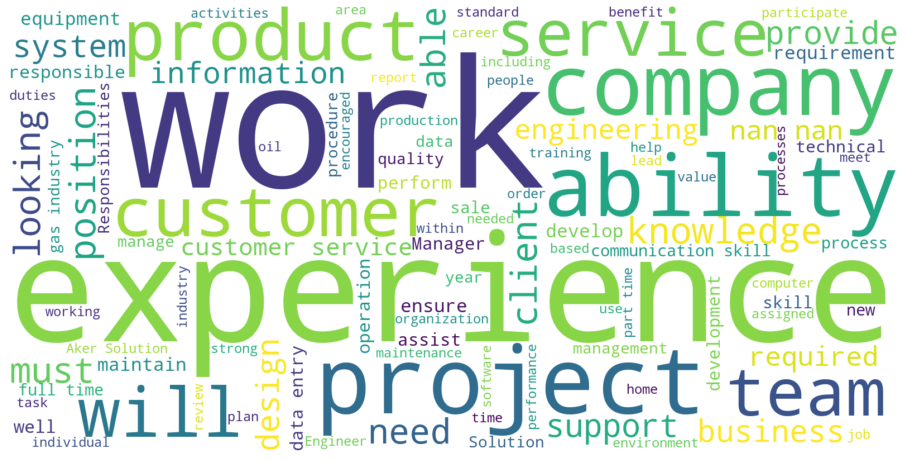

In [ ]:
# Fake jobs wordcloud
plt.figure(figsize = (16,14))
wc = WordCloud(background_color='white', min_font_size = 3,  max_words = 100 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

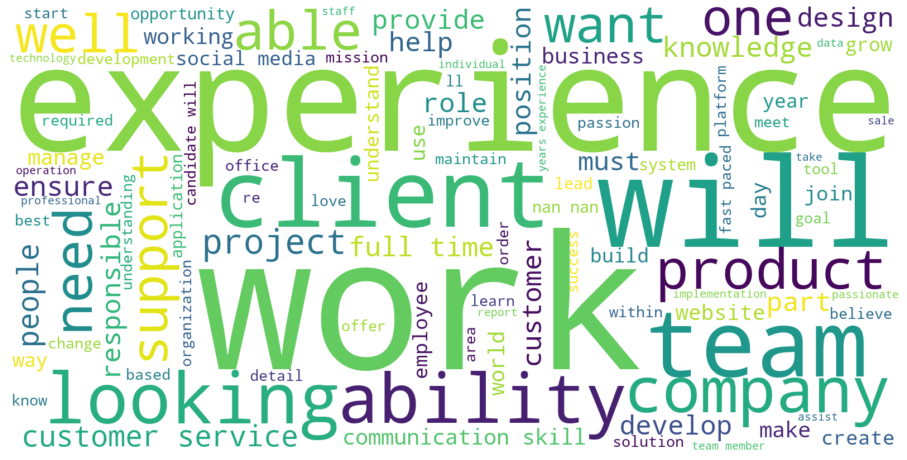

In [ ]:
# Actual jobs wordcloud
plt.figure(figsize = (16,14))
wc = WordCloud(background_color='white', min_font_size = 3,  max_words = 100 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(actualjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')

# Visualization of location

In [ ]:
def country_locater(location):
    place = location
    area = re.findall("\w+", place)
    return(area[0]+"_")
    
def state_locater(location):
    place = location
    area = re.findall("\w+", place)
    try:
        state = area[1]
    except:
        state = area[0]
    return(state)

In [ ]:
dirty_posting[['location']] = dirty_posting[['location']].applymap(str)

dirty_posting["country"] = dirty_posting["location"].apply(lambda x : country_locater(x))

dirty_posting["state"] = dirty_posting["location"].apply(lambda x : state_locater(x))

Text(0.5, 1.0, 'Real Post')

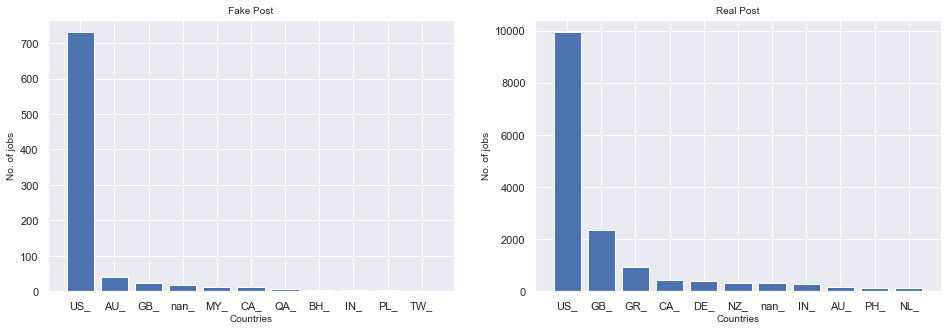

In [ ]:
# Visualize job postings by countries
fcountry = dict(dirty_posting[dirty_posting['fraudulent'] == 1].country.value_counts()[:11])
rcountry = dict(dirty_posting[dirty_posting['fraudulent'] == 0].country.value_counts()[:11])

f, axes = plt.subplots(1,2, figsize=(16,5))

axes[0].bar(fcountry.keys(), fcountry.values())
axes[0].set_ylabel('No. of jobs', size=10)
axes[0].set_xlabel('Countries', size=10)
axes[0].set_title('Fake Post', size = 10)

axes[1].bar(rcountry.keys(), rcountry.values())
axes[1].set_ylabel('No. of jobs', size=10)
axes[1].set_xlabel('Countries', size=10)
axes[1].set_title('Real Post', size = 10)

Text(0.5, 1.0, 'Real Post')

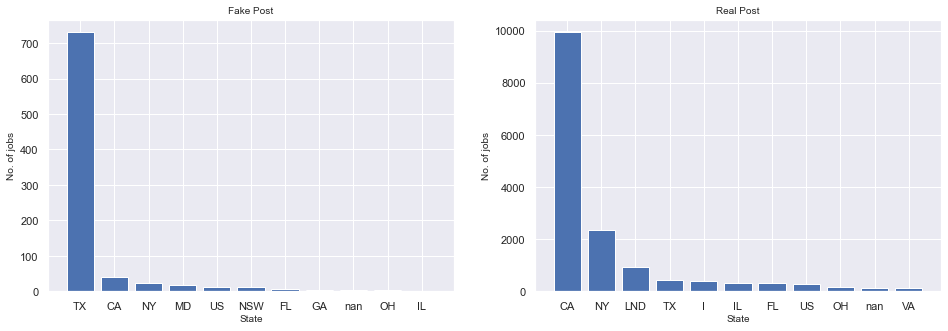

In [ ]:
# Visualize job postings by states
fcity = dict(dirty_posting[dirty_posting['fraudulent'] == 1].state.value_counts()[:11])
rcity = dict(dirty_posting[dirty_posting['fraudulent'] == 0].state.value_counts()[:11])

f, axes = plt.subplots(1,2, figsize=(16,5))

axes[0].bar(fcity.keys(), fcountry.values())
axes[0].set_ylabel('No. of jobs', size=10)
axes[0].set_xlabel('State', size=10)
axes[0].set_title('Fake Post', size = 10)

axes[1].bar(rcity.keys(), rcountry.values())
axes[1].set_ylabel('No. of jobs', size=10)
axes[1].set_xlabel('State', size=10)
axes[1].set_title('Real Post', size = 10)

# Visualization of number of characters within features containing prose
- company_profile
- description
- requirements
- benefits

In [ ]:
# Extracting text features
text_df = dirty_posting[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]
text_df = text_df.fillna(' ')

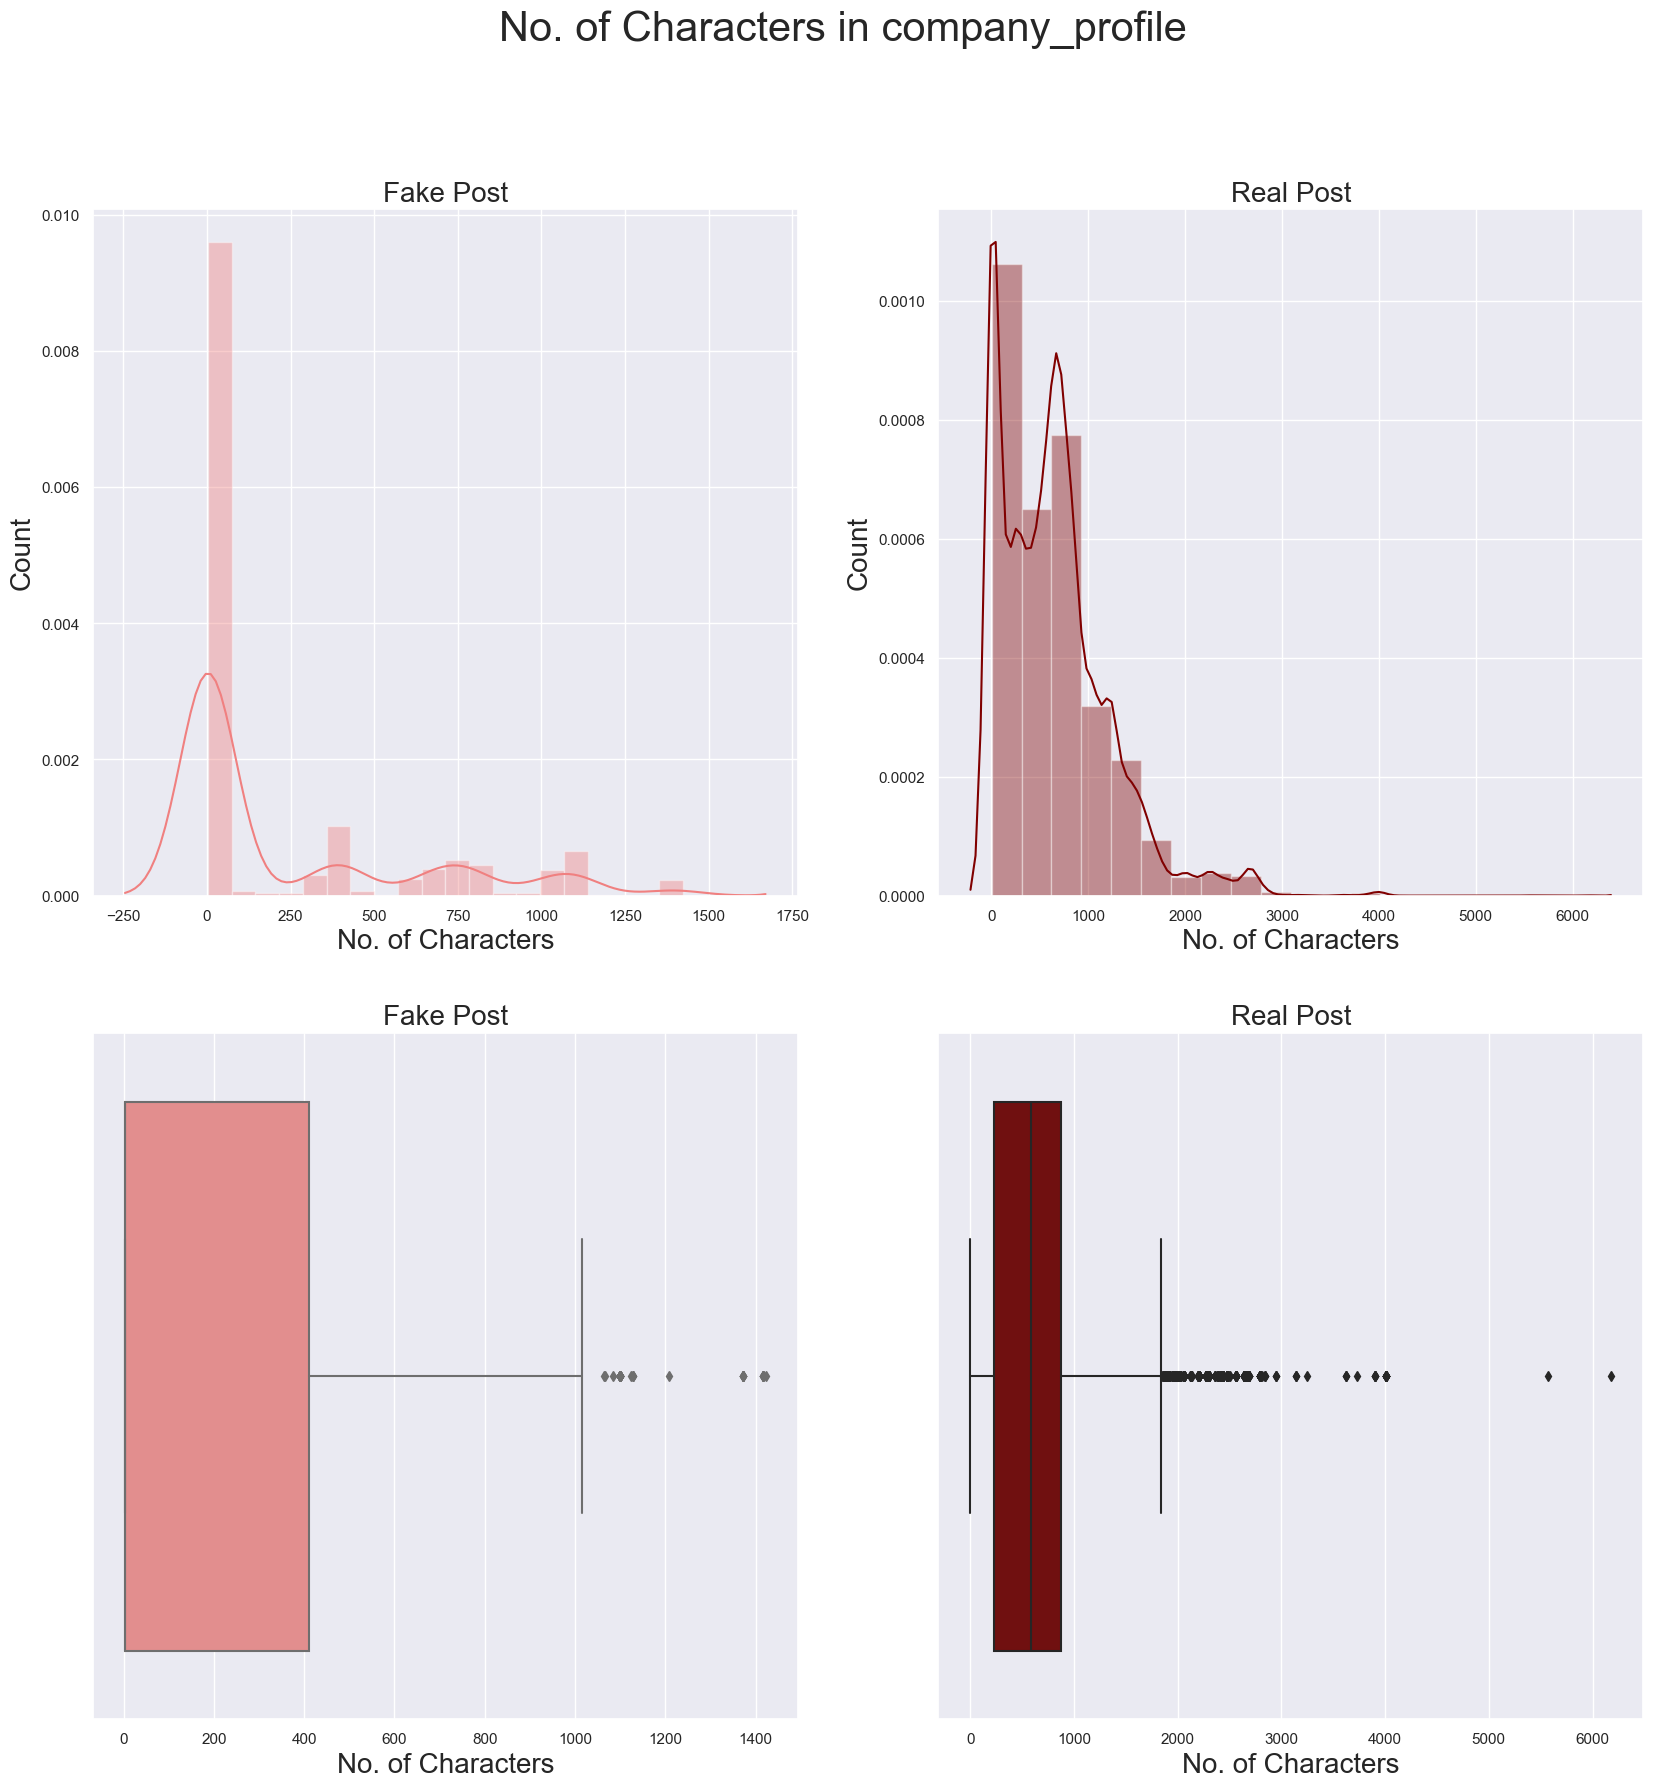

In [ ]:
# Number of characters in real post and fake post for Company Profile
# Dist and Box plots
f, axes= plt.subplots(2,2, figsize=(20, 20), dpi=100)

length=text_df[text_df["fraudulent"]==1]['company_profile'].str.len()
sb.distplot(length,bins = 20,color='lightcoral', ax = axes[0,0])
axes[0,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['company_profile'].str.len()
sb.distplot(length, bins = 20,color ='maroon', ax = axes[0,1])
axes[0,1].set_title('Real Post', size = 20)

length=text_df[text_df["fraudulent"]==1]['company_profile'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,0], color = 'lightcoral')
axes[1,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['company_profile'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,1], color = 'maroon')
axes[1,1].set_title('Real Post', size = 20)

axes[0,0].set_xlabel('No. of Characters', size=20)
axes[0,1].set_xlabel('No. of Characters', size=20)
axes[0,0].set_ylabel('Count', size=20)
axes[0,1].set_ylabel('Count', size=20)

axes[1,0].set_xlabel('No. of Characters', size=20)
axes[1,1].set_xlabel('No. of Characters', size=20)

plt.suptitle('No. of Characters in company_profile', fontsize=30)
plt.show()

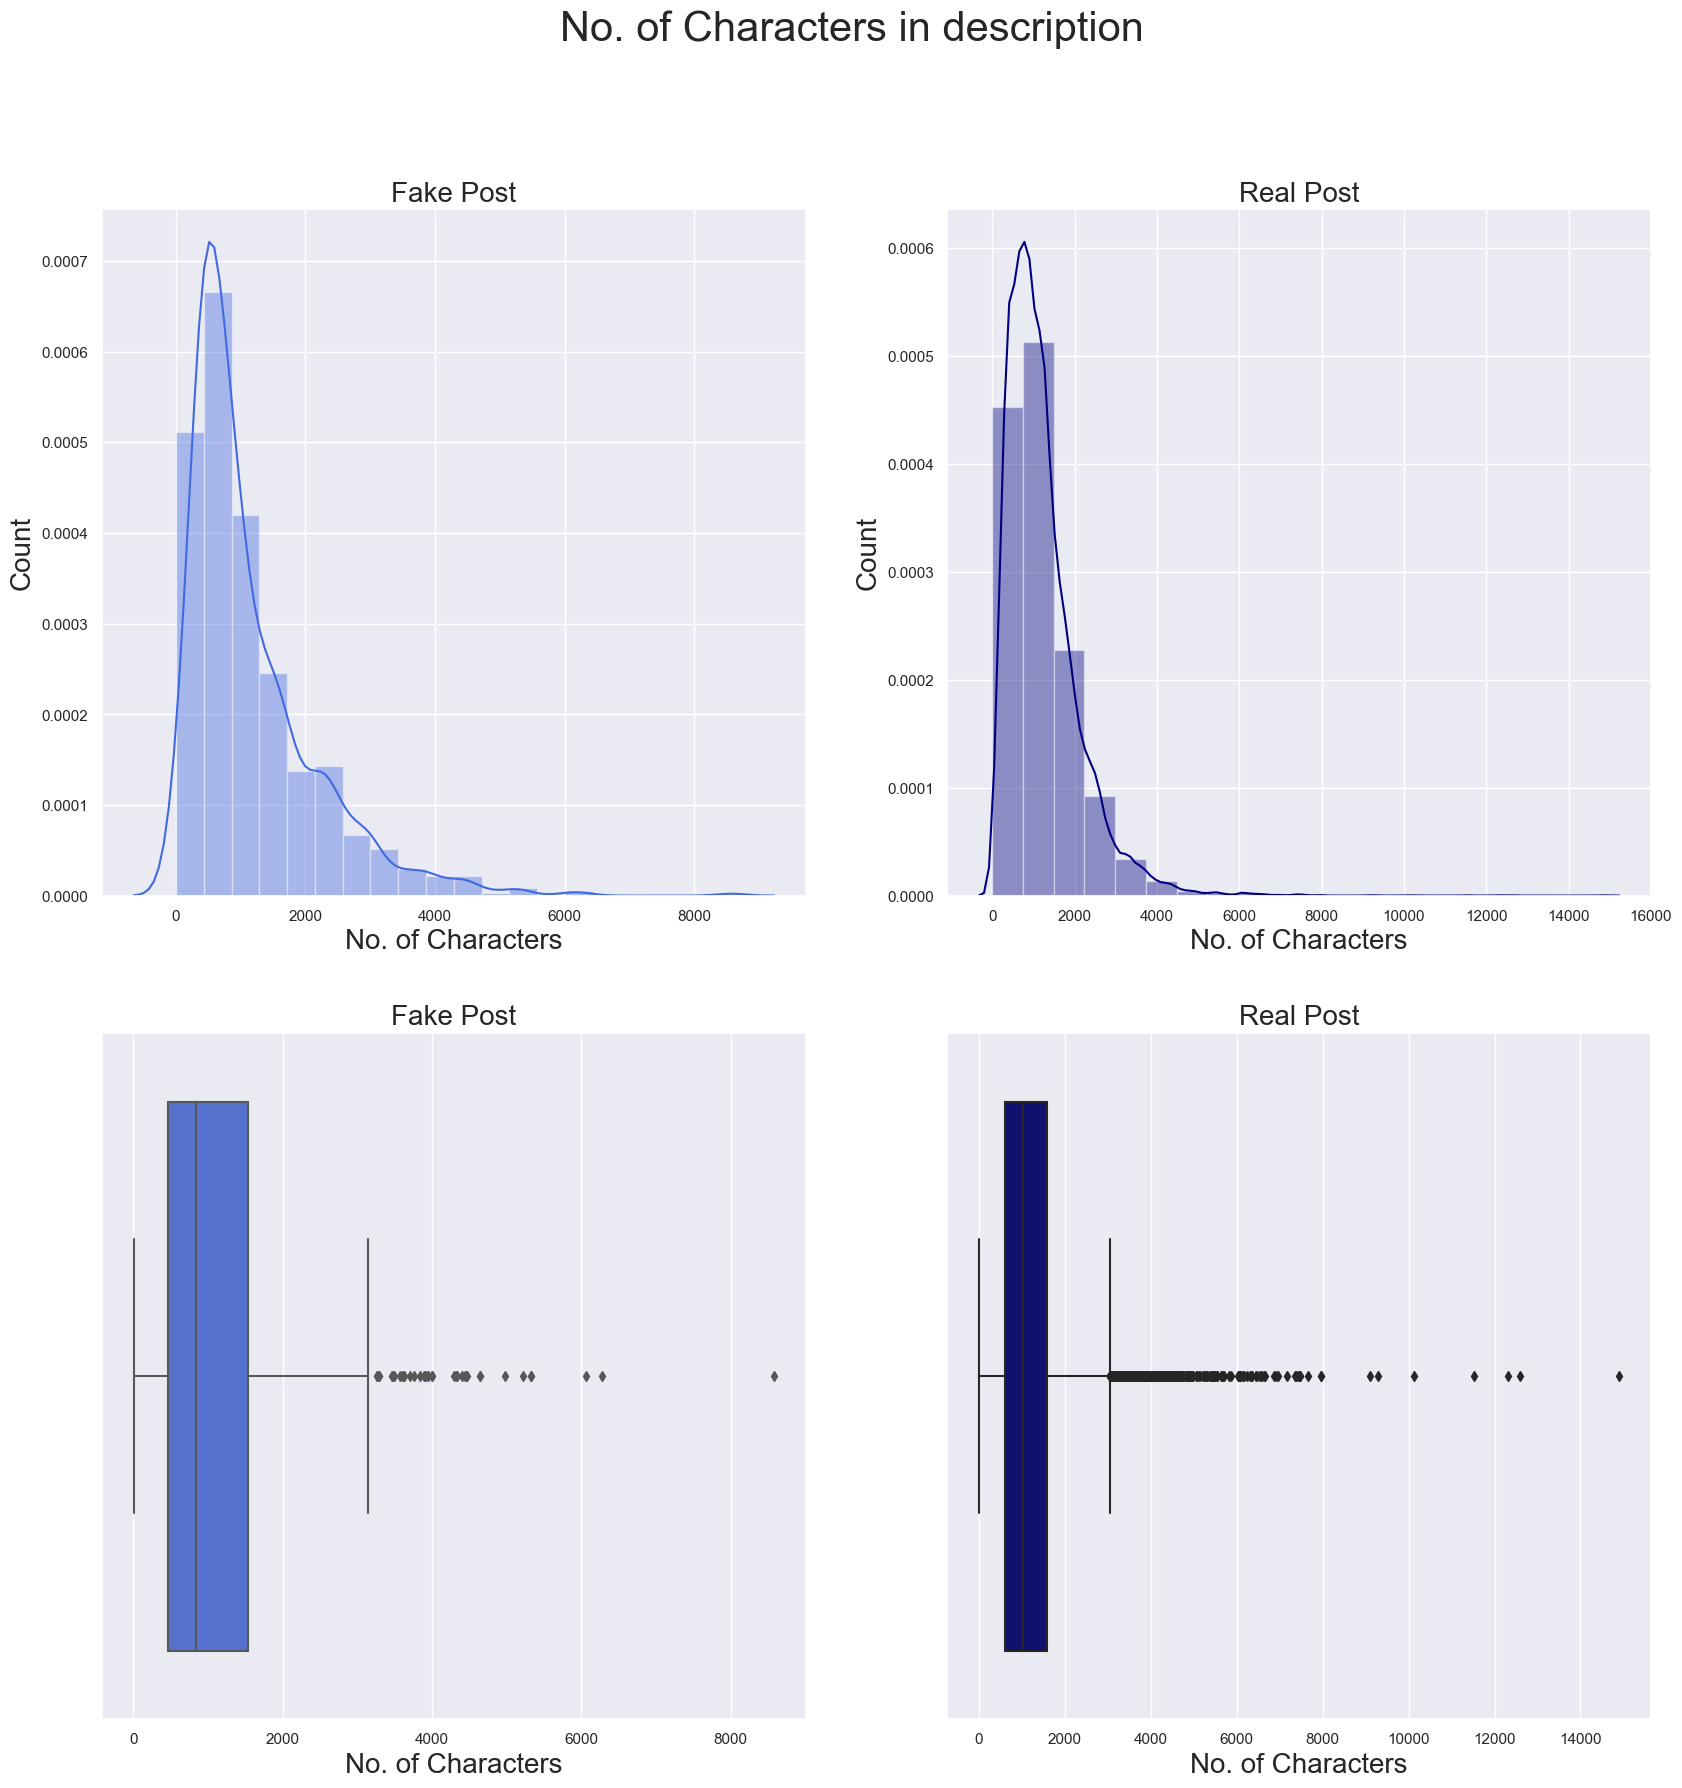

In [ ]:
# Number of characters in real post and fake post for Company Profile
# Dist and Box plots
f, axes= plt.subplots(2,2, figsize=(20, 20), dpi=100)

length=text_df[text_df["fraudulent"]==1]['description'].str.len()
sb.distplot(length,bins = 20,color='royalblue', ax = axes[0,0])
axes[0,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['description'].str.len()
sb.distplot(length, bins = 20,color ='navy', ax = axes[0,1])
axes[0,1].set_title('Real Post', size = 20)

length=text_df[text_df["fraudulent"]==1]['description'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,0], color = 'royalblue')
axes[1,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['description'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,1], color = 'navy')
axes[1,1].set_title('Real Post', size = 20)

axes[0,0].set_xlabel('No. of Characters', size=20)
axes[0,1].set_xlabel('No. of Characters', size=20)
axes[0,0].set_ylabel('Count', size=20)
axes[0,1].set_ylabel('Count', size=20)

axes[1,0].set_xlabel('No. of Characters', size=20)
axes[1,1].set_xlabel('No. of Characters', size=20)

plt.suptitle('No. of Characters in description', fontsize=30)
plt.show()

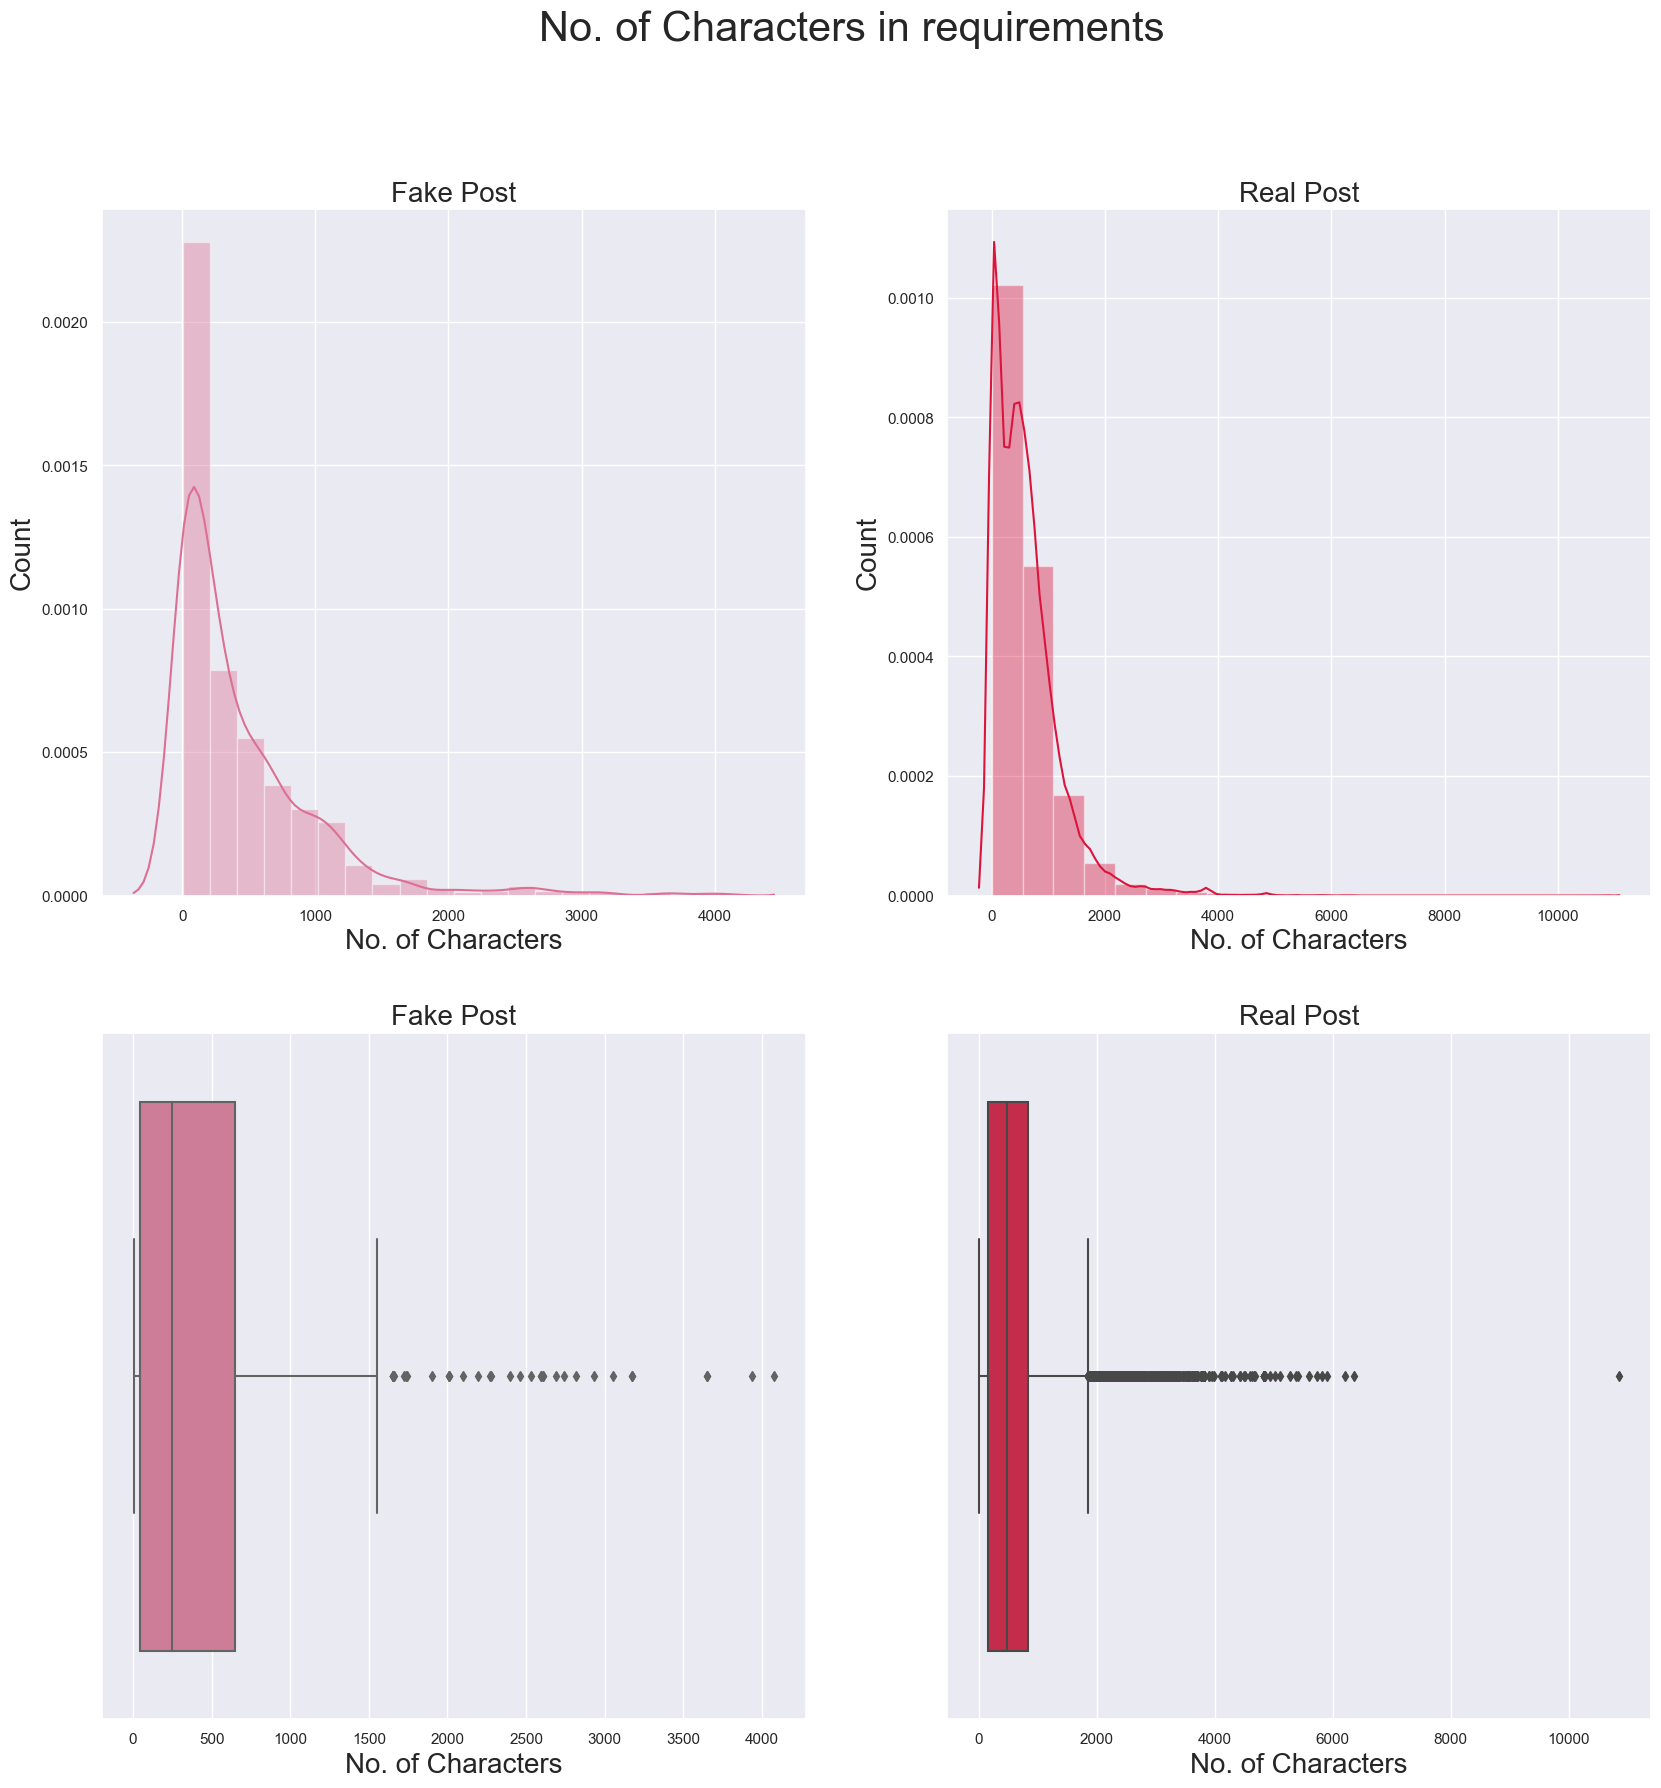

In [ ]:
# Number of characters in real post and fake post for Company Profile
# Dist and Box plots
f, axes= plt.subplots(2,2, figsize=(20, 20), dpi=100)

length=text_df[text_df["fraudulent"]==1]['requirements'].str.len()
sb.distplot(length,bins = 20,color='palevioletred', ax = axes[0,0])
axes[0,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['requirements'].str.len()
sb.distplot(length, bins = 20,color ='crimson', ax = axes[0,1])
axes[0,1].set_title('Real Post', size = 20)

length=text_df[text_df["fraudulent"]==1]['requirements'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,0], color = 'palevioletred')
axes[1,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['requirements'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,1], color = 'crimson')
axes[1,1].set_title('Real Post', size = 20)

axes[0,0].set_xlabel('No. of Characters', size=20)
axes[0,1].set_xlabel('No. of Characters', size=20)
axes[0,0].set_ylabel('Count', size=20)
axes[0,1].set_ylabel('Count', size=20)

axes[1,0].set_xlabel('No. of Characters', size=20)
axes[1,1].set_xlabel('No. of Characters', size=20)

plt.suptitle('No. of Characters in requirements', fontsize=30)
plt.show()

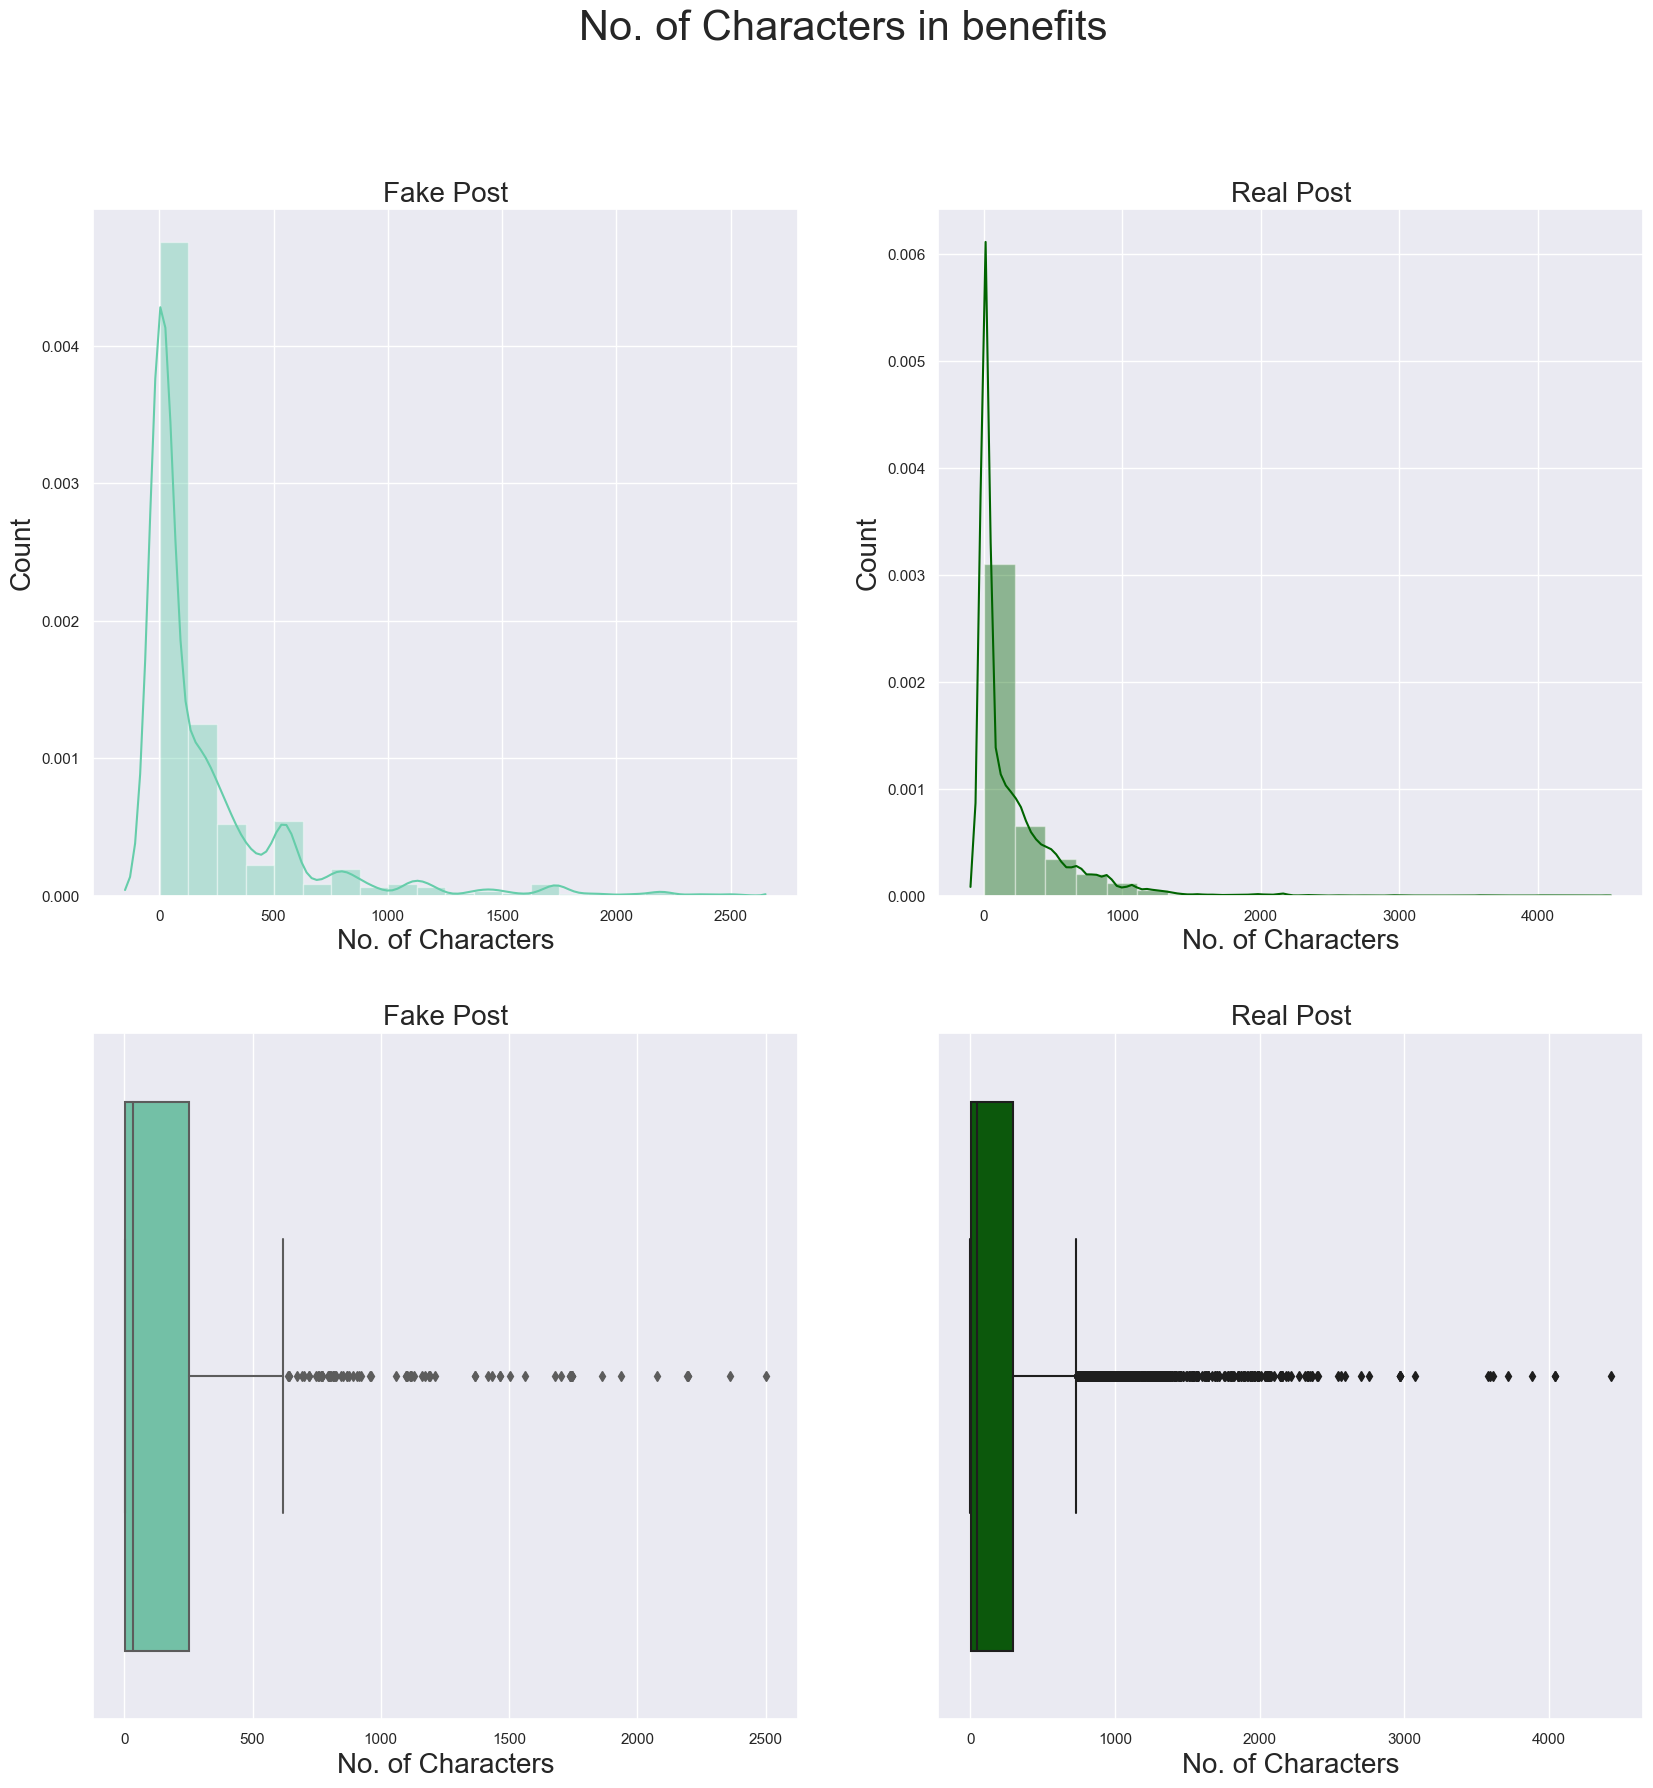

In [ ]:
# Number of characters in real post and fake post for Company Profile
# Dist and Box plots
f, axes= plt.subplots(2,2, figsize=(20, 20), dpi=100)

length=text_df[text_df["fraudulent"]==1]['benefits'].str.len()
sb.distplot(length,bins = 20,color='mediumaquamarine', ax = axes[0,0])
axes[0,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['benefits'].str.len()
sb.distplot(length, bins = 20,color ='darkgreen', ax = axes[0,1])
axes[0,1].set_title('Real Post', size = 20)

length=text_df[text_df["fraudulent"]==1]['benefits'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,0], color = 'mediumaquamarine')
axes[1,0].set_title('Fake Post', size = 20)

length=text_df[text_df["fraudulent"]==0]['benefits'].str.len()
sb.boxplot(length, orient = "h", ax = axes[1,1], color = 'darkgreen')
axes[1,1].set_title('Real Post', size = 20)

axes[0,0].set_xlabel('No. of Characters', size=20)
axes[0,1].set_xlabel('No. of Characters', size=20)
axes[0,0].set_ylabel('Count', size=20)
axes[0,1].set_ylabel('Count', size=20)

axes[1,0].set_xlabel('No. of Characters', size=20)
axes[1,1].set_xlabel('No. of Characters', size=20)

plt.suptitle('No. of Characters in benefits', fontsize=30)
plt.show()